<a href="https://colab.research.google.com/github/WISSAL-MN/FAKE-NEWS-DECTION/blob/main/FND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'https://github.com/WISSAL-MN'

'https://github.com/WISSAL-MN'

In [2]:
import pandas as pd

In [3]:
true = pd.read_csv('True.csv')

In [4]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [5]:
fake = pd.read_csv('Fake.csv')

In [6]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [7]:
true.shape

(21417, 4)

In [8]:
fake.shape

(23481, 4)

In [9]:
true['label'] = 1

In [10]:
true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [11]:
fake['label'] = 0

In [12]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [13]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [14]:
df.shape


(10002, 5)

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

In [16]:
df.head()

,title,text,subject,date,label
0,Professor Who Predicted Trump’s Election Has ...,"Until November 8, Democrats desperately tried ...",News,"November 19, 2016",0
1,Former intelligence chief Clapper: Comey was u...,WASHINGTON (Reuters) - Former Director of Nati...,politicsNews,"May 12, 2017",1
2,"After weeks of secrecy, Senate to unveil healt...",WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"June 20, 2017",1
3,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",0
4,Fox And Friends Completely Panics And Cuts Se...,While the right accuses the left of being sno...,News,"August 23, 2017",0


In [17]:
X = df.drop('label', axis=1)

In [18]:
y = df['label']

In [19]:
df = df.dropna()

In [20]:
messages = df.copy()

In [21]:
messages.reset_index(inplace=True)

In [22]:
messages.head()

,index,title,text,subject,date,label
0,0,Professor Who Predicted Trump’s Election Has ...,"Until November 8, Democrats desperately tried ...",News,"November 19, 2016",0
1,1,Former intelligence chief Clapper: Comey was u...,WASHINGTON (Reuters) - Former Director of Nati...,politicsNews,"May 12, 2017",1
2,2,"After weeks of secrecy, Senate to unveil healt...",WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"June 20, 2017",1
3,3,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",0
4,4,Fox And Friends Completely Panics And Cuts Se...,While the right accuses the left of being sno...,News,"August 23, 2017",0


In [23]:
messages['title'][2]

'After weeks of secrecy, Senate to unveil healthcare bill'

In [24]:
messages['text'][2]

'WASHINGTON (Reuters) - U.S. Senate Republicans plan to unveil the text of their draft healthcare bill on Thursday as senators struggle over issues such as the future of the Medicaid program for the poor and bringing down insurance costs. Republicans in the chamber have been working for weeks behind closed doors on legislation aimed at repealing and replacing major portions of the Affordable Care Act, former Democratic President Barack Obama’s signature healthcare law, popularly known as Obamacare. The effort has been plagued from the start by tensions between moderates and conservatives, which surfaced again on Tuesday. Democrats have also criticized the behind-the-scenes meetings, staging a protest on the Senate floor on Monday. “Republicans are writing their healthcare bill under the cover of darkness because they are ashamed of it,” Senate Democratic leader Chuck Schumer charged.  President Donald Trump campaigned on a promise to repeal Obamacare. The 2010 law extended insurance co

### Preprocessing


In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
len(corpus)

10002

In [28]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [29]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [30]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [31]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.033499,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.018014,0.0,0.0,0.000000,0.0,0.0,0.024036


### Passive Aggressive Classifier - Baseline

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [34]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


In [35]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


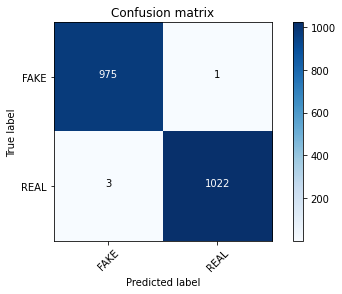

In [36]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
classifier.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [38]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [39]:
val = tfidf_v.transform([review]).toarray()

In [40]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
classifier.predict(val)

array([1])

### Saving model and TFIDF Vectorizer

In [46]:
import joblib as jb

In [47]:
#from sklearn.externals import joblib

In [49]:
jb.dump(classifier, 'model.pkl')

['model.pkl']

In [50]:
jb.dump(tfidf_v, 'tfidfvect.pkl')

['tfidfvect.pkl']

### Load model and vectorizer and predict on previous preprocessed datapoint

In [51]:
joblib_model = jb.load('model.pkl')

In [52]:
joblib_tfidfvect = jb.load('tfidfvect.pkl')

In [53]:
val_pkl = joblib_tfidfvect.transform([review]).toarray()

In [54]:
joblib_model.predict(val_pkl)

array([1])

### Save some datapoints for text random generation

In [55]:
frames_2 = [true.loc[0:10][:], fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

In [56]:
df_2.to_csv('random_dataset.csv', index=False)